# 1. Tìm hiểu vấn đề

+ **Mô tả**:
    + Gồm có 2 bộ dữ liệu bao gồm:
        + train.csv: 891 mẫu và có 11 đặc trưng và 1 biến kết quả.
        + test.csv: 418 mẫu và có 11 đặc trưng và không có biến kết quả.
+ **Dữ liệu vào**:
    + pclass: vé hạng nhất = 1st, vé hạng hai = 2nd, vé hạng ba = 3rd
    + sibsp: # anh chị em ruột/ vợ/ chồng trên tàu Titanic
    + parch: # số lượng cha mẹ / con cái cùng ở trên tàu Titanic.
    + ticket: ID của vé
    + cabin: Số của cabin
    + embarked: Cảng C = Cherbourg, Q = Queenstown, S = Southampton
+ **Kết quả**: Survived (0 = Không, 1 = Có)

# 2. Chuẩn bị vấn đề

## 2.1 khai báo thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## 2.2 Nạp dữ liệu

In [2]:
df = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

# 3. Phân tích khám quá dữ liệu

## 3.1. Thống kê mô tả (Descriptive Statistics) - Ungraphic Approach


### (1) **Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### (2) **Kiểm tra tính toàn vẹn của dữ liệu**
+ Dữ liệu có bị trùng lặp không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị Null không? Hiển thị dòng bị vi phạm.
+ Dữ liệu có tồn tại giá trị NaN không? Hiển thị dòng bị vi phạm.

In [7]:
if df.duplicated().sum().any() == True:
    print("Có giá trị trùng lặp.")
else:
    print("không có giá trị trùng lặp.")
df.duplicated().sum()

không có giá trị trùng lặp.


np.int64(0)

In [8]:
if df.isna().sum().any() == True:
    print("Có giá trị NaN")
else:
    print("Không có giá trị NaN")

df.isna().sum()

Có giá trị NaN


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
if df.isnull().sum().any() == True:
    print("Có giá trị Null")
else:
    print("Không có giá trị Null")

df.isna().sum()

Có giá trị Null


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
df['Survived'].map({0:'Tử vong',1:'Sống sót'}).value_counts()

Survived
Tử vong     549
Sống sót    342
Name: count, dtype: int64

**Nhận xét**:
+ Dữ liệu có không có dòng bị trùng.
+ Dữ liệu có có giá trị rỗng (NaN, Null) ở Age: 177, Canbin: 687, Embarked: 2

In [10]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## 3.2. Hiển thị dữ liệu (Visualize Data) - Graphic Approach

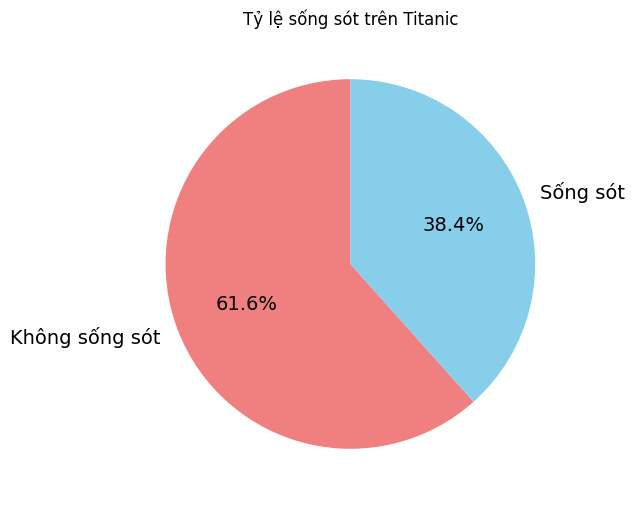

In [11]:
# Đếm số lượng người sống sót và không sống sót
survived_counts = df['Survived'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6,6))
plt.pie(
    survived_counts,
    labels=['Không sống sót', 'Sống sót'],
    autopct='%1.1f%%',     # Hiển thị phần trăm
    startangle=90,         # Bắt đầu từ góc 90 độ
    colors=['lightcoral', 'skyblue'],
    textprops={'fontsize': 14}
)
plt.title('Tỷ lệ sống sót trên Titanic')
plt.show()

In [ ]:
def bar_chart(feature,ti): #Tạo hàm để sử dụng cho các feature phân tích chung với 'Survived'
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    temp = pd.DataFrame([survived,dead]) #Tạo dataframe mới chứa hai series kết hợp lại
    temp.index = ['Sống sót','Tử vong'] #Gán lại 'Survived', 'Dead' để dễ hiểu hơn
    temp.plot(kind='bar',stacked=True, figsize=(10,5),title=ti,rot=45)
    display(temp) #Show dataframe vừa tạo

In [40]:
def grouped_bar_chart(df, feature, ti):
    # 1. Nhóm dữ liệu theo 'Survived' và 'feature' (giới tính) và đếm
    grouped_counts = df.groupby(['Survived', feature]).size()
    temp = grouped_counts.unstack(level='Survived')
    temp.columns = ['Tử vong', 'Sống sót']
    ax = temp.plot(kind='bar', stacked=False, figsize=(10, 5), title=ti, rot=0)
    ax.set_xlabel(feature)
    ax.legend(title='Trạng thái')
    display(temp)
    plt.show() 

,Tử vong,Sống sót
Sex,,
female,81,233
male,468,109


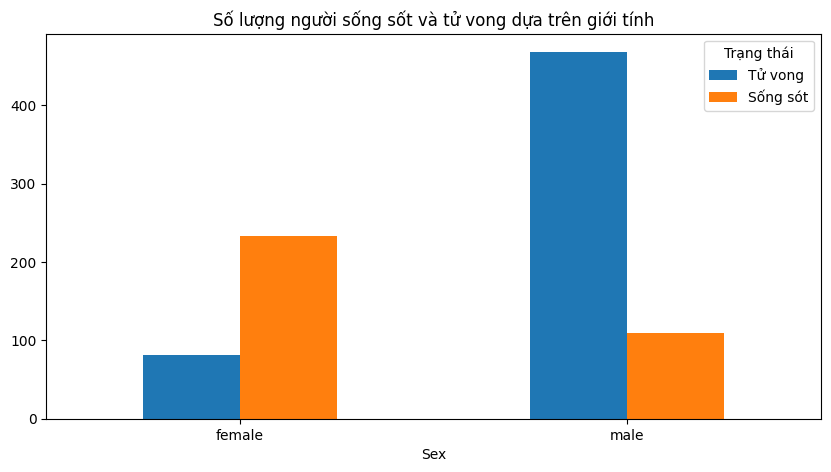

In [33]:
grouped_bar_chart(df,'Sex','Số lượng người sống sốt và tử vong dựa trên giới tính')

Bảng dữ liệu cho thấy: ***Phụ nữ có khả năng sống sót cao hơn đàn ông***

,Tử vong,Sống sót
Pclass,,
1,80,136
2,97,87
3,372,119


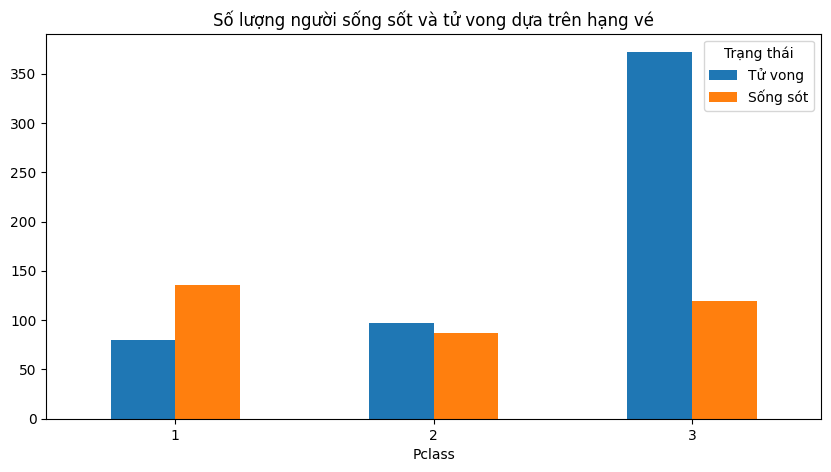

In [34]:
grouped_bar_chart(df,'Pclass','Số lượng người sống sốt và tử vong dựa trên hạng vé')

Bảng dữ liệu cho thấy: 

***Phụ nữ có khả năng sống sót cao hơn đàn ông***

vé **hạng nhất** có tỉ lệ sống sót cao hơn các vé *còn lại*

vé **hạng ba** có tỉ lệ chết cao hơn các vé *còn lại*

,Tử vong,Sống sót
SibSp,,
0,398.0,210.0
1,97.0,112.0
2,15.0,13.0
3,12.0,4.0
4,15.0,3.0
5,5.0,NaN
8,7.0,NaN


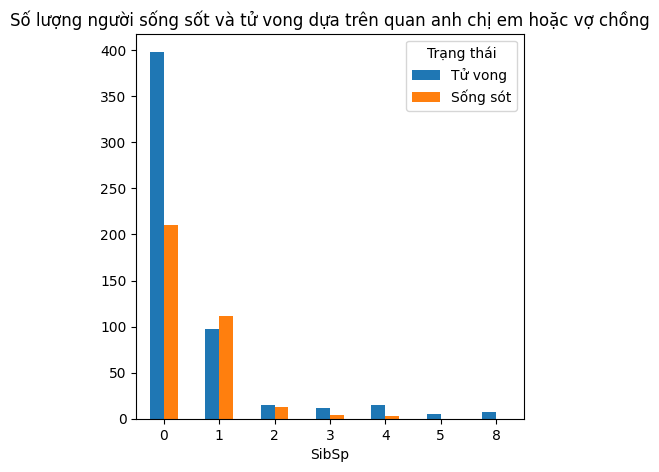

In [38]:
grouped_bar_chart(df,'SibSp','Số lượng người sống sốt và tử vong dựa trên quan anh chị em hoặc vợ chồng')

Bảng dữ liệu cho thấy: 

***Phụ nữ có khả năng sống sót cao hơn đàn ông***

Người **có** hơn 2 anh em hoặc là vợ/chồng có tỉ lệ **sống sót cao hơn**

Người **không** anh em hoặc là vợ/chồng có tỉ lệ **chết cao hơn**

,Tử vong,Sống sót
Parch,,
0,445.0,233.0
1,53.0,65.0
2,40.0,40.0
3,2.0,3.0
4,4.0,NaN
5,4.0,1.0
6,1.0,NaN


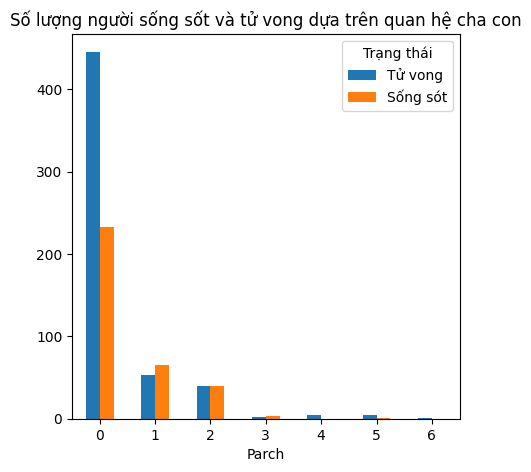

In [39]:
grouped_bar_chart(df,'Parch','Số lượng người sống sốt và tử vong dựa trên quan hệ cha con')

Biểu đồ xác nhận một người lên tàu cùng với hơn 2 cha mẹ hoặc con cái có nhiều khả năng **sống sót** hơn.

Biểu đồ xác nhận một người lên tàu một mình có nhiều khả năng **tử vong** hơn.

,Tử vong,Sống sót
Embarked,,
C,75,93
Q,47,30
S,427,217


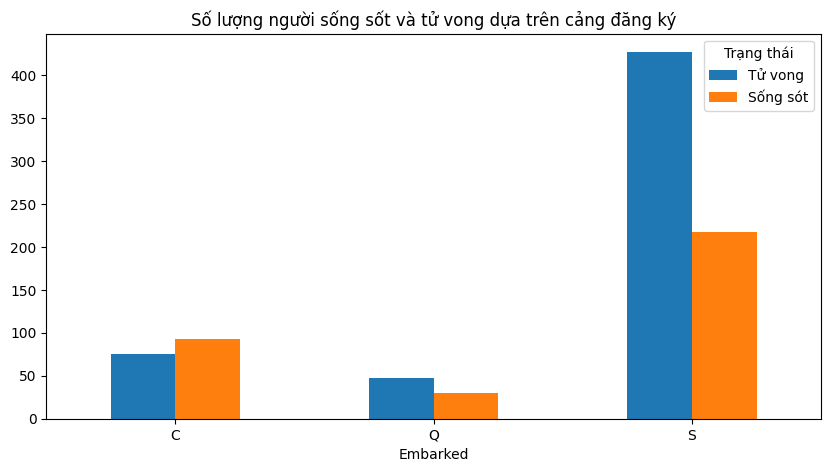

In [41]:
grouped_bar_chart(df,'Embarked','Số lượng người sống sốt và tử vong dựa trên cảng đăng ký')

Embarked,S,C,Q
Sống sót,217,93,30
Tử vong,427,75,47


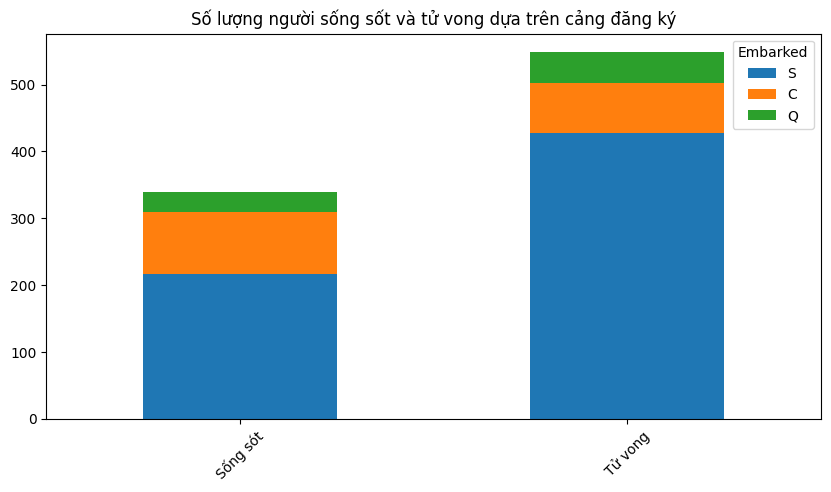

In [17]:
bar_chart('Embarked','Số lượng người sống sốt và tử vong dựa trên cảng đăng ký')

Biểu đồ xác nhận rằng một người lên tàu từ cảng C (Cherbourg) có nhiều khả năng sống sót hơn.

Biểu đồ xác nhận rằng một người lên tàu từ cảng Q (Queenstown) có nhiều khả năng tử vong hơn.

Biểu đồ xác nhận rằng một người lên tàu từ cảng S (Southampton) có nhiều khả năng tử vong hơn.

Có những biến không liên quan đến kết quả predict như là: **PassengerID, Name, Ticket, Fare** vì là các biến là Unique.

## 3.3 Độ tương quan

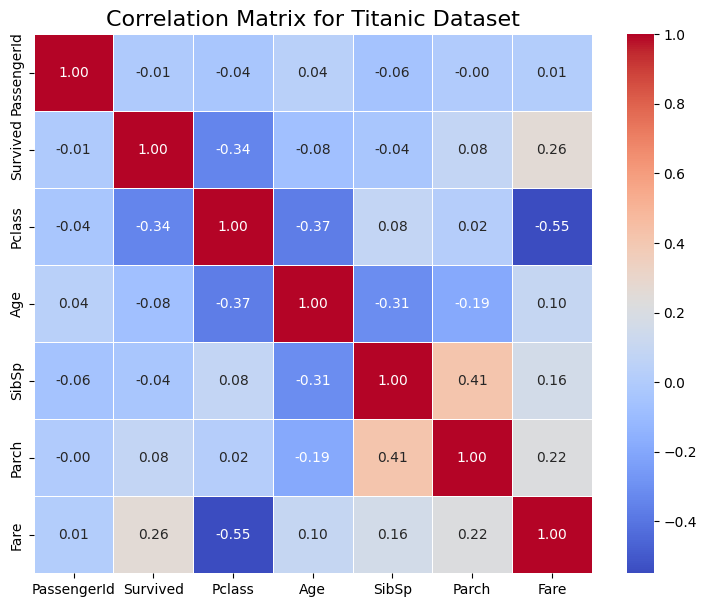

In [18]:
plt.figure(figsize=(9,7))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,          # Show the correlation values
    fmt=".2f",           # Format decimal places
    cmap="coolwarm",     # Color palette
    linewidths=0.5,      # Lines between cells
    cbar=True            # Show color bar
)
plt.title("Correlation Matrix for Titanic Dataset", fontsize=16)
plt.show()

## 3.4 Độ xiên

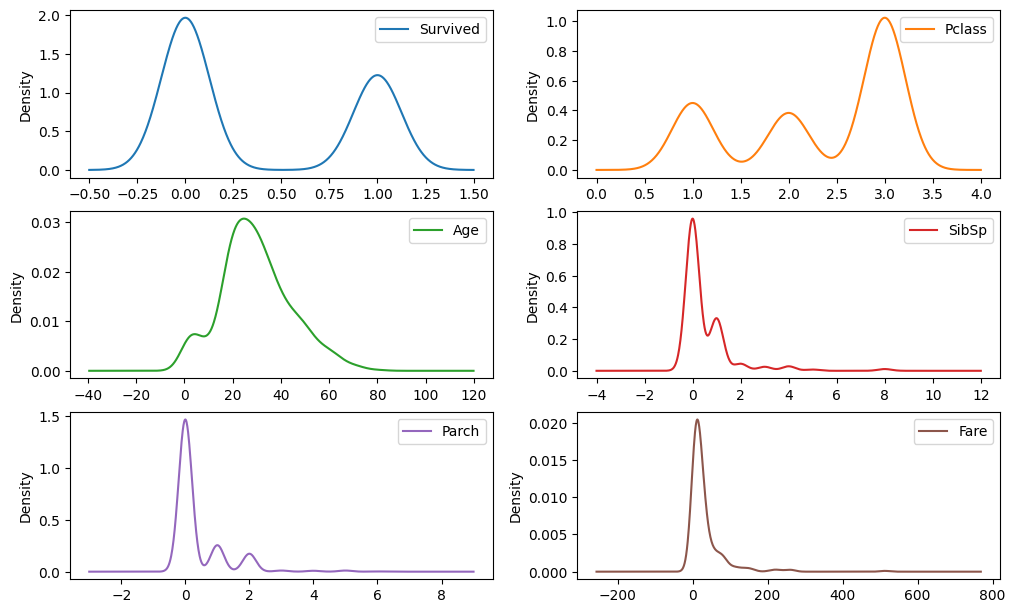

In [19]:
df.drop('PassengerId',axis=1).plot(kind="density", subplots=True, layout=(4,2), sharex=False, figsize=(12,10))
plt.show()


In [20]:
skew_values = df.skew(numeric_only=True)
print(skew_values)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64
